In [76]:
#Housing Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Malli Mounika\Downloads\Housing1.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.shape

(545, 13)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
#Convert Yes/No columns to numeric
yes_no_cols = [
    'mainroad','guestroom','basement',
    'hotwaterheating','airconditioning','prefarea'
]

for col in yes_no_cols:
    df[col] = df[col].map({'yes':1, 'no':0})

In [12]:
#Encode Furnishing Status

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [22]:
#Separate Features & Target
X = df.drop('price', axis=1).astype(float).values
y = df['price'].astype(float).values

In [23]:
#Train–Test Split
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

X_train = X[indices[:split]]
X_test  = X[indices[split:]]
y_train = y[indices[:split]]
y_test  = y[indices[split:]]

In [25]:
#Add bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test  = np.c_[np.ones(X_test.shape[0]), X_test]

In [26]:
# Train model using Normal Equation
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [28]:
# prediction 
y_pred = X_test @ theta

In [29]:
#Evaluation metrics
MAE = np.mean(np.abs(y_test - y_pred))
MSE = np.mean((y_test - y_pred)**2)
RMSE = np.sqrt(MSE)

SS_res = np.sum((y_test - y_pred)**2)
SS_tot = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - SS_res / SS_tot

print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)

MAE : nan
MSE : nan
RMSE: nan
R2 Score: nan


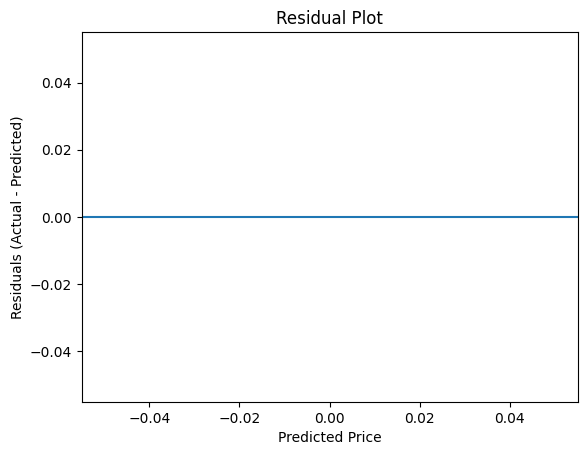

In [44]:
#Visualization
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.axhline(y=0)
plt.show()

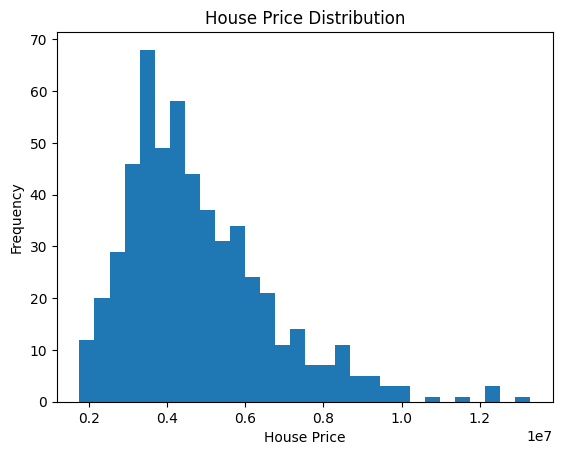

In [45]:
plt.figure()
plt.hist(y, bins=30)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("House Price Distribution")
plt.show()

In [32]:
new_house = np.array([[7420, 4, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1]])

In [34]:
# X is feature matrix WITHOUT bias (shape m x 12)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

In [36]:
# X_features must NOT have bias column
# Shape: (m, 12)

X_features = X[:, 1:]   # remove bias column if already added

X_mean = np.mean(X_features, axis=0)
X_std = np.std(X_features, axis=0)

print(X_mean.shape, X_std.shape)

(12,) (12,)


In [40]:
print(theta.shape)

(14,)


In [52]:
# new house features (12 features)
new_house = np.array([[7420, 4, 2, 2, 1, 99, 10, 1, 1, 2, 1, 1]])

# fix std to avoid divide-by-zero
X_std[X_std == 0] = 1

# scale
new_house = (new_house - X_mean) / X_std

# add bias
new_house = np.c_[np.ones(1), new_house]

# fix theta (match features)
theta = theta[:13].reshape(-1, 1)

# predict
predicted_price = new_house @ theta

# print safely
print("Predicted House Price:", float(predicted_price[0][0]))

Predicted House Price: nan


In [54]:
#Customer Segmentation Clusturing
df = pd.read_csv(r"C:\Users\Malli Mounika\Downloads\Jewellery Customer Segmentation Analysis Personas.csv")
df

,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,IsActive,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate
0,1,56,Male,North America,Bracelet,9,737,81.888889,2.079020,24,...,True,85.052053,368.5,737,22/07/2020,NaN,24.300000,85.052053,9,0.6
1,2,46,Female,Middle East,Ring,3,334,111.333333,7.614333,18,...,True,87.253327,167.0,334,23/06/2021,NaN,24.200000,87.253327,3,0.6
2,3,32,Male,Asia,Ring,1,515,515.000000,5.783094,10,...,True,56.871368,257.5,515,29/08/2021,NaN,16.466667,56.871368,1,0.6
3,4,60,Other,North America,Bracelet,7,1037,148.142857,3.591508,7,...,True,86.957420,518.5,1037,27/05/2022,NaN,1.966667,86.957420,7,0.6
4,5,25,Male,Europe,Ring,5,598,119.600000,5.435376,8,...,False,96.423852,299.0,598,24/04/2022,27/05/2023,1.900000,96.423852,5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Female,Middle East,Ring,2,248,124.000000,8.794321,1,...,True,58.061541,124.0,248,16/07/2020,NaN,42.466667,58.061541,2,0.6
996,997,40,Other,Europe,Earrings,6,1084,180.666667,1.089196,7,...,True,143.956859,542.0,1084,17/02/2021,NaN,33.733333,143.956859,6,0.6
997,998,27,Other,Middle East,Ring,6,951,158.500000,8.002417,12,...,True,125.513362,475.5,951,06/06/2022,NaN,8.766667,125.513362,6,0.6
998,999,61,Female,Europe,Earrings,1,1556,1556.000000,5.146602,10,...,True,108.662392,778.0,1556,23/01/2021,NaN,25.333333,108.662392,1,0.6


In [55]:
df.describe()

,CustomerID,Age,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,CustomerCost,CustomerProfitabilityScore,ROAS,...,NetProfit,NetProfitMargin,CLTV,MarketingSpend,ProductCost,SalesRevenue,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,40.986000,4.950000,1055.497000,337.211734,5.435866,12.860000,627.748500,427.748500,10.55497,...,211.099400,20.0,3166.491000,99.331802,527.748500,1055.497000,21.583667,99.331802,4.950000,6.000000e-01
std,288.819436,13.497852,2.589248,536.106004,370.326897,2.567504,6.952895,268.053002,268.053002,5.36106,...,107.221201,0.0,1608.318012,28.592622,268.053002,536.106004,10.273195,28.592622,2.589248,2.221557e-16
min,1.000000,18.000000,1.000000,102.000000,14.500000,1.000276,1.000000,151.000000,-49.000000,1.02000,...,20.400000,20.0,306.000000,50.003072,51.000000,102.000000,-3.333333,50.003072,1.000000,6.000000e-01
25%,250.750000,29.000000,3.000000,597.750000,120.787500,3.238559,7.000000,398.875000,198.875000,5.97750,...,119.550000,20.0,1793.250000,74.584313,298.875000,597.750000,14.166667,74.584313,3.000000,6.000000e-01
50%,500.500000,42.000000,5.000000,1042.500000,205.187500,5.474661,13.000000,621.250000,421.250000,10.42500,...,208.500000,20.0,3127.500000,99.107992,521.250000,1042.500000,21.883333,99.107992,5.000000,6.000000e-01
75%,750.250000,52.000000,7.000000,1498.250000,385.875000,7.573640,19.000000,849.125000,649.125000,14.98250,...,299.650000,20.0,4494.750000,123.555091,749.125000,1498.250000,28.883333,123.555091,7.000000,6.000000e-01
max,1000.000000,64.000000,9.000000,1995.000000,1992.000000,9.979745,24.000000,1097.500000,897.500000,19.95000,...,399.000000,20.0,5985.000000,149.955770,997.500000,1995.000000,46.266667,149.955770,9.000000,6.000000e-01


In [56]:
#Feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X_std[X_std == 0] = 1   # avoid NaN
X = (X - X_mean) / X_std

In [58]:
K=3

np.random.seed(42)
random_idx = np.random.choice(len(X), K, replace=False)
centroids = X[random_idx]

In [75]:
new_centroids = []

for k in range(K):
    if np.any(labels == k):               # cluster not empty
        new_centroids.append(X[labels == k].mean(axis=0))
    else:                                 # empty cluster
        new_centroids.append(centroids[k])

new_centroids = np.array(new_centroids)

In [73]:
for _ in range(100):

    # Step 1: assign clusters
    distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    labels = np.argmin(distances, axis=1)

    # Step 2: update centroids safely
    new_centroids = []
    for k in range(K):
        if np.any(labels == k):
            new_centroids.append(X[labels == k].mean(axis=0))
        else:
            new_centroids.append(centroids[k])

    new_centroids = np.array(new_centroids)

    # Step 3: convergence check (MUST be inside loop)
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids   # update INSIDE loop

In [74]:
print("Final centroids:")
print(centroids)

Final centroids:
[[ 9.16697910e-17 -1.42304619e-15 -2.15607348e-15 -5.49967818e-16
              nan             nan             nan             nan
              nan -8.51510503e-17             nan  4.13532613e-16
   8.67807355e-17]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan]]


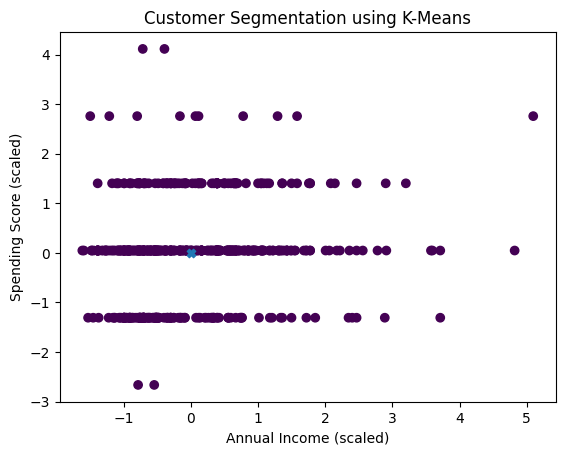

In [61]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='X')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation using K-Means")
plt.show()

In [62]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(545)}
